<h1>Posttest 6 Kecerdasan Buatan<h1>

<h3>Nama : Sarah Syifani<h3>
<h3>NIM : 2109106131<h3>

Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from tensorflow.keras import Sequential, layers, callbacks

Membaca Dataset 

In [2]:
df = pd.read_csv("wines_SPA.csv")
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


Data Preprocessing

Data Cleaning

In [3]:
##Mengecek apakah terdapat data null
df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

Data Transforming, menggunakan simpleimputer

In [4]:
imputer = SimpleImputer(strategy="most_frequent")
df["year"] = imputer.fit_transform(df[["year"]])
df["type"] = imputer.fit_transform(df[["type"]])
df["body"] = imputer.fit_transform(df[["body"]])
df["acidity"] = imputer.fit_transform(df[["acidity"]])

Memeriksa Nilai Null pada dataset

In [5]:
df.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

DNN

Split data

In [11]:
X = df[['num_reviews']]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Buat arsitektur DNN

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential([
    Dense(units=5, activation='linear', input_shape=(None,1))#activasi sesuaikan dengan permasalahan(klasifikasi atau regresi)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 5)           10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model Compile

In [8]:
model.compile(
    optimizer='adam', 
    loss='mean_squared_error',
    metrics=['accuracy']
)

Model Fit

Membuat callback untuk memonitoring val_loss
Menggunakan library ModelCheckpoint untuk menyimpan hasil terbaik selama pelatihan
Misalkan val_loss tidak menurun atau tidak membaik

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model checkpoint untuk menyimpan model terbaik selama pelatihan (dengan val_loss terendah)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [25]:
trained_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=model_checkpoint)


Epoch 1/500
  1/165 [..............................] - ETA: 0s - loss: 0.0282 - accuracy: 0.0000e+00

143/165 [=========================>....] - ETA: 0s - loss: 0.1076 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 1.38199, saving model to best_model.h5
165/165 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.0000e+00 - val_loss: 1.3820 - val_accuracy: 0.0000e+00
Epoch 2/500
136/165 [=======================>......] - ETA: 0s - loss: 7.4189 - accuracy: 0.0000e+00 

c:\Users\ACER\c2-21\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.38199 to 0.02478, saving model to best_model.h5
165/165 [==============================] - 0s 2ms/step - loss: 6.1552 - accuracy: 0.0000e+00 - val_loss: 0.0248 - val_accuracy: 0.0000e+00
Epoch 3/500
132/165 [=======================>......] - ETA: 0s - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 3: val_loss improved from 0.02478 to 0.01815, saving model to best_model.h5
165/165 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.0000e+00 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 4/500
130/165 [======================>.......] - ETA: 0s - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 4: val_loss improved from 0.01815 to 0.01662, saving model to best_model.h5
165/165 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.0000e+00 - val_loss: 0.0166 - val_accuracy: 0.0000e+00
Epoch 5/500
143/165 [=========================>....] - ETA: 0s - loss: 0.0173 - accuracy: 0.0000e+00
Epoch 5: val_loss improved from 0

Mengevaluasi model DNN dengan data test dan mengembalikan nilai kerugian (loss) dan akurasi yang diperoleh

In [29]:
model.evaluate(X_test, y_test)


 1/71 [..............................] - ETA: 2s - loss: 0.0152 - accuracy: 0.0000e+00

71/71 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.0000e+00


[0.015279924497008324, 0.0]

Mengambil metrik akurasi (accuracy) dari setiap epoch



In [33]:
training_accuracy = trained_data.history['accuracy']
validation_accuracy = trained_data.history['val_accuracy']

Membuat grafik untuk akurasi

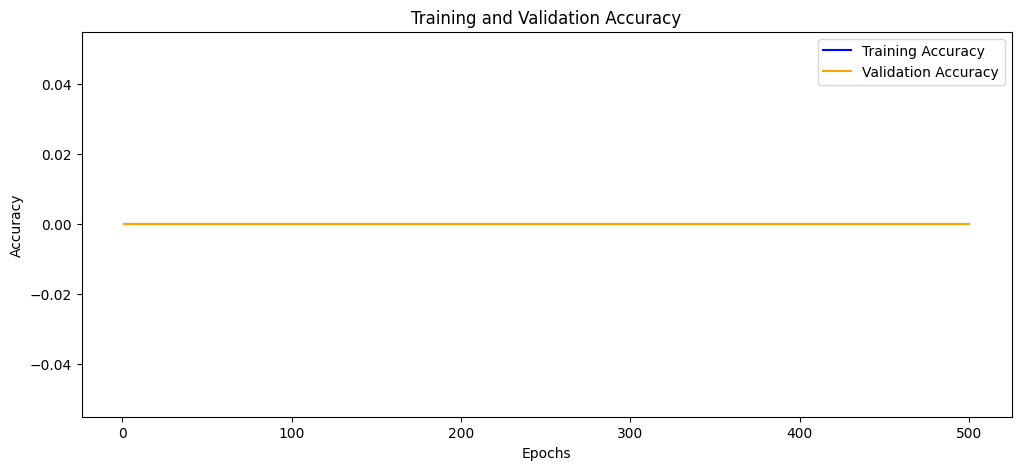

In [34]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy',  color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Mengambil loss dari setiap epoch



In [32]:
training_loss = trained_data.history['loss']
validation_loss = trained_data.history['val_loss']

Membuat grafik untuk loss



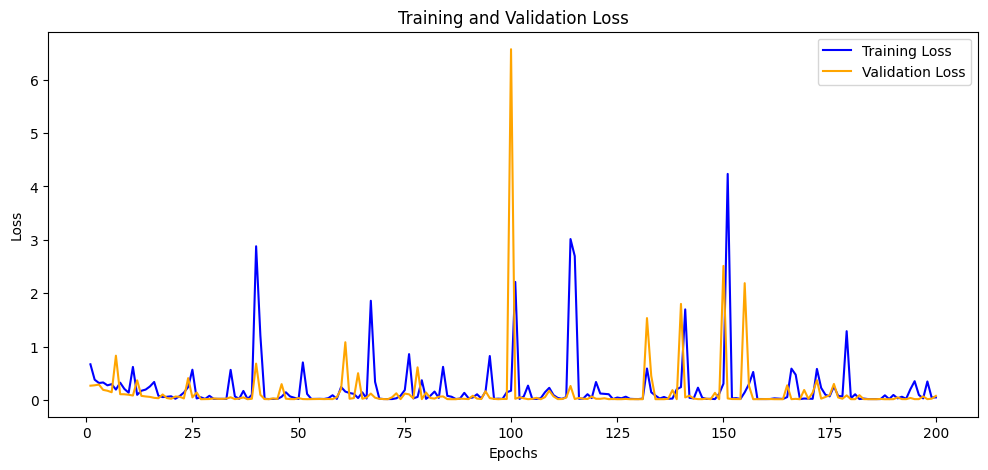

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()